## Shoe Price Predictor

In [1]:

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import r2_score , mean_squared_error
import joblib
sns.set_palette(palette='viridis')

In [2]:
df = pd.read_csv('Shoe_Data.csv')
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,2017-09-01,Yeezy,Adidas Yeezy Boost 350 Low V2 Beluga,1097,220,2016-09-24,11.0,California
1,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Copper,685,220,2016-11-23,11.0,California
2,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Green,690,220,2016-11-23,11.0,California
3,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red,1075,220,2016-11-23,11.5,Kentucky
4,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red 2017,828,220,2017-02-11,11.0,Rhode Island


In [3]:
df.shape

(99956, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99956 entries, 0 to 99955
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    99956 non-null  object 
 1   Brand         99956 non-null  object 
 2   Sneaker Name  99956 non-null  object 
 3   Sale Price    99956 non-null  int64  
 4   Retail Price  99956 non-null  int64  
 5   Release Date  99956 non-null  object 
 6   Shoe Size     99956 non-null  float64
 7   Buyer Region  99956 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 6.1+ MB


In [5]:
df.isna().sum()

Order Date      0
Brand           0
Sneaker Name    0
Sale Price      0
Retail Price    0
Release Date    0
Shoe Size       0
Buyer Region    0
dtype: int64

In [6]:
df[df.duplicated()]

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
994,2017-10-13,Yeezy,Adidas Yeezy Boost 350 V2 Cream White,425,220,2017-04-29,10.5,Illinois
1028,2017-10-13,Yeezy,Adidas Yeezy Boost 350 V2 Zebra,560,220,2017-02-25,8.5,California
1513,2017-11-09,Off-White,Nike Blazer Mid Off White,550,130,2017-09-09,9.0,California
1531,2017-11-10,Yeezy,Adidas Yeezy Boost 350 V2 Cream White,460,220,2017-04-29,10.0,California
1619,2017-11-11,Off-White,Nike Air Presto Off White,975,160,2017-09-09,10.0,California
...,...,...,...,...,...,...,...,...
99815,2019-02-13,Off-White,Nike Air Max 90 Off White Desert Ore,520,160,2019-02-07,9.0,Oregon
99882,2019-02-13,Yeezy,adidas Yeezy Boost 350 V2 Butter,228,220,2018-06-30,9.0,Oregon
99907,2019-02-13,Yeezy,adidas Yeezy Boost 350 V2 Static,350,220,2018-12-27,9.5,Oregon
99924,2019-02-13,Yeezy,adidas Yeezy Boost 350 V2 Static,330,220,2018-12-27,9.0,Oregon


In [7]:
df.drop_duplicates(keep='first' , inplace=True)

In [8]:
df[df.duplicated()]

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region


In [9]:
df['Order Date'] = pd.to_datetime(df['Order Date'] )

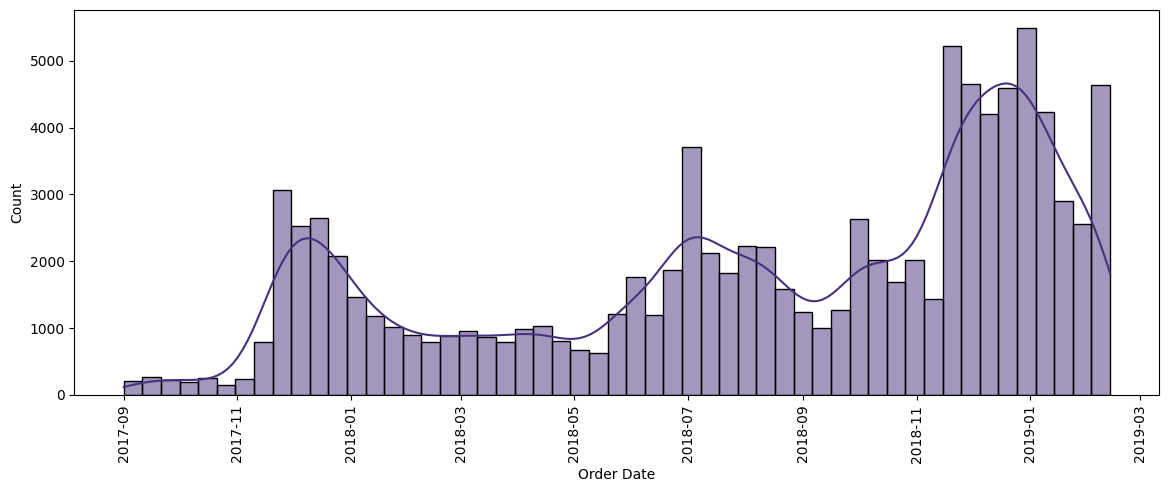

In [10]:
plt.figure(figsize=(14,5))
sns.histplot(df['Order Date'] , kde = True)
plt.xticks(rotation=90)
plt.show()

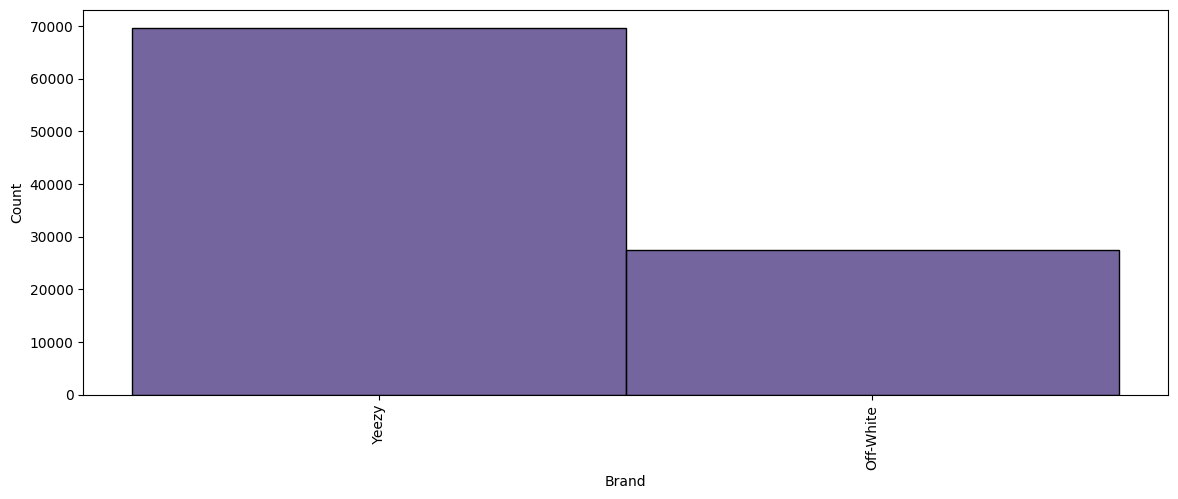

In [11]:
plt.figure(figsize=(14,5))
sns.histplot(df['Brand'] )
plt.xticks(rotation=90)
plt.show()

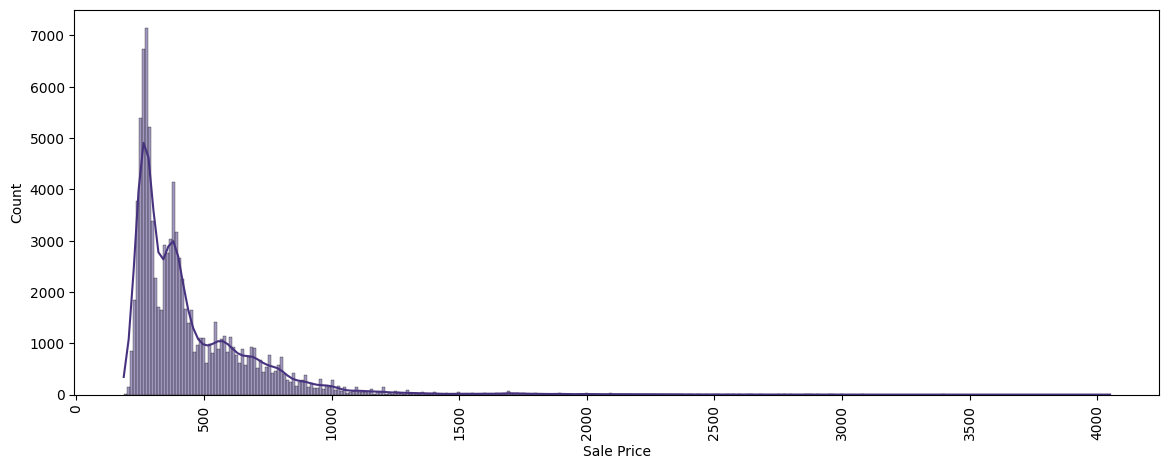

In [12]:
plt.figure(figsize=(14,5))
sns.histplot(df['Sale Price'] , kde=True)
plt.xticks(rotation=90)
plt.show()

**Mostly all the prices are uptill 1200**

<Axes: xlabel='Sale Price'>

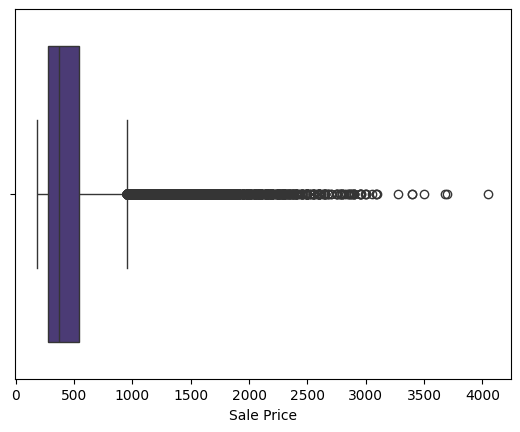

In [13]:
sns.boxplot(x = df['Sale Price'] )

In [14]:
df[df['Sale Price'] > 1000].count()

Order Date      2985
Brand           2985
Sneaker Name    2985
Sale Price      2985
Retail Price    2985
Release Date    2985
Shoe Size       2985
Buyer Region    2985
dtype: int64

In [15]:
#lets drop these outliers 
df = df[~(df['Sale Price'] > 1000)]

In [16]:
df[df['Sale Price'] > 1000].count()

Order Date      0
Brand           0
Sneaker Name    0
Sale Price      0
Retail Price    0
Release Date    0
Shoe Size       0
Buyer Region    0
dtype: int64

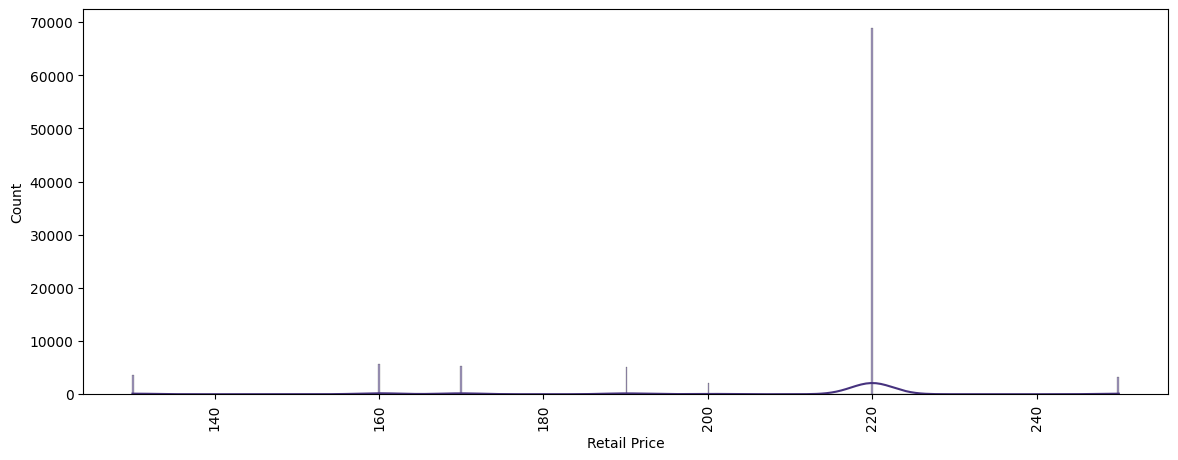

In [17]:
plt.figure(figsize=(14,5))
sns.histplot(df['Retail Price'] , kde=True)
plt.xticks(rotation=90)
plt.show()

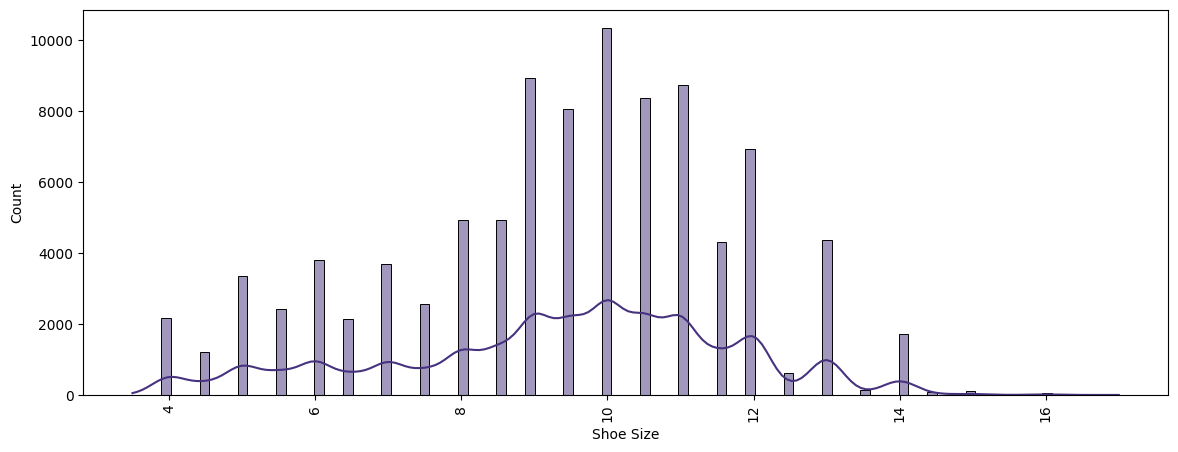

In [18]:

plt.figure(figsize=(14,5))
sns.histplot(df['Shoe Size'] , kde=True)
plt.xticks(rotation=90)
plt.show()

<Axes: ylabel='Shoe Size'>

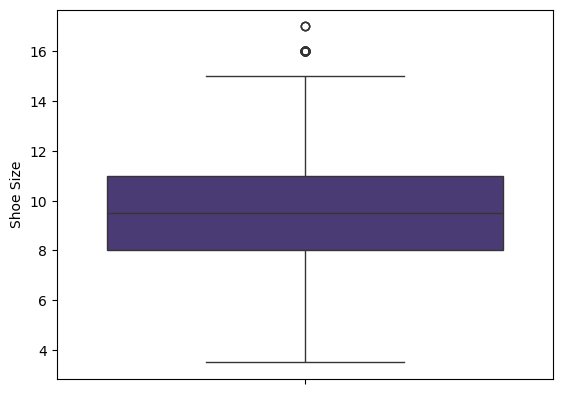

In [19]:
sns.boxplot(df['Shoe Size'])

In [20]:
# anything above size 14 is an outlier also we will take lowerlimit as 4

df = df[~ ( (df['Shoe Size'] > 14) & (df['Shoe Size'] > 14) )] 


In [21]:
df[(df['Shoe Size'] > 14) & (df['Shoe Size'] > 14)]

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region


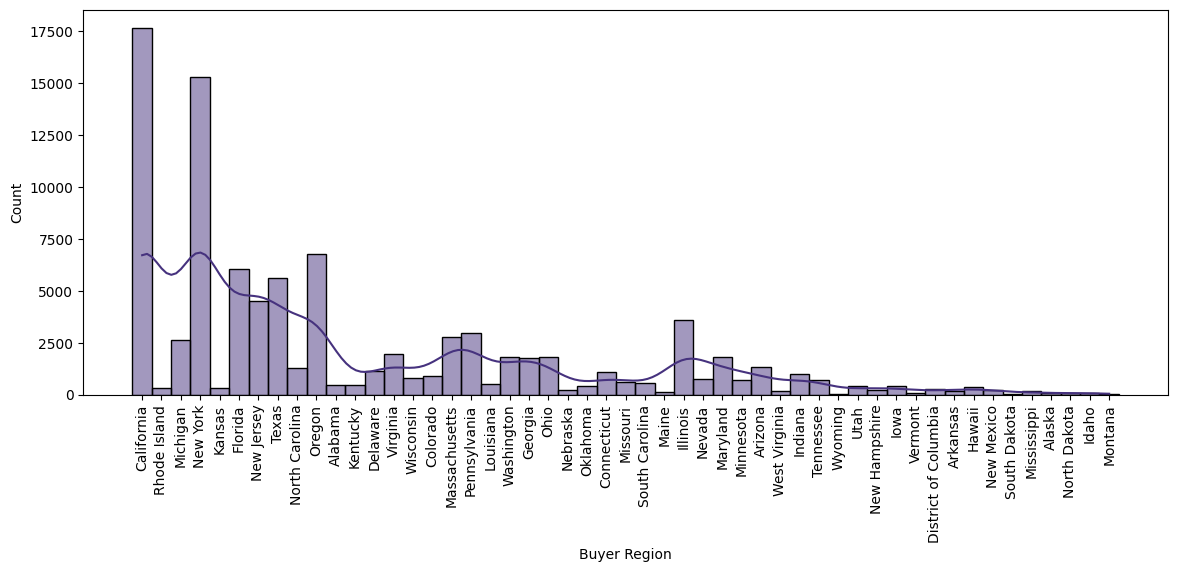

In [22]:

plt.figure(figsize=(14,5))
sns.histplot(df['Buyer Region'] , kde=True)
plt.xticks(rotation=90)
plt.show()

In [23]:
# since there will be many columns in dummy encoding for sneaker name lets extract first three letters only

# Split the sneaker name into words and join the first three words
df['Sneaker Name'] = df['Sneaker Name'].apply(lambda x: ' '.join(x.split()[:3]))



In [24]:
df['Sneaker Name'].value_counts()

Sneaker Name
Adidas Yeezy Boost      50780
adidas Yeezy Boost      18319
Nike Zoom Fly            4256
Nike Air Presto          3854
Air Jordan 1             3771
Nike Blazer Mid          3501
Nike Air VaporMax        3289
Nike Air Max             3253
Nike Air Force           2356
Nike React Hyperdunk      482
Name: count, dtype: int64

In [25]:
df["Brand"].value_counts()

Brand
 Yeezy       69099
Off-White    24762
Name: count, dtype: int64

In [26]:
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
1,2017-09-01,Yeezy,Adidas Yeezy Boost,685,220,2016-11-23,11.0,California
2,2017-09-01,Yeezy,Adidas Yeezy Boost,690,220,2016-11-23,11.0,California
4,2017-09-01,Yeezy,Adidas Yeezy Boost,828,220,2017-02-11,11.0,Rhode Island
5,2017-09-01,Yeezy,Adidas Yeezy Boost,798,220,2017-02-11,8.5,Michigan
6,2017-09-01,Yeezy,Adidas Yeezy Boost,784,220,2016-12-17,11.0,California


In [27]:
df['Sneaker Name'].value_counts()

Sneaker Name
Adidas Yeezy Boost      50780
adidas Yeezy Boost      18319
Nike Zoom Fly            4256
Nike Air Presto          3854
Air Jordan 1             3771
Nike Blazer Mid          3501
Nike Air VaporMax        3289
Nike Air Max             3253
Nike Air Force           2356
Nike React Hyperdunk      482
Name: count, dtype: int64

In [28]:
df['Sneaker Name'] = df['Sneaker Name'].replace('adidas Yeezy Boost' , 'Adidas Yeezy Boost')

In [29]:
df['Sneaker Name'].value_counts()

Sneaker Name
Adidas Yeezy Boost      69099
Nike Zoom Fly            4256
Nike Air Presto          3854
Air Jordan 1             3771
Nike Blazer Mid          3501
Nike Air VaporMax        3289
Nike Air Max             3253
Nike Air Force           2356
Nike React Hyperdunk      482
Name: count, dtype: int64

In [30]:
import datetime as dt

df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Order Date']=df['Order Date'].map(dt.datetime.toordinal)

df['Release Date'] = pd.to_datetime(df['Release Date'])
df['Release Date']= df['Release Date'].map(dt.datetime.toordinal)

### Model Building

In [31]:
y = df['Sale Price']
X = df.drop('Sale Price' , axis=1)

In [32]:
# applying train test split

X_train ,X_test,  y_train ,y_test = train_test_split(X , y , random_state=42 , train_size=0.7)


In [33]:
X_train

,Order Date,Brand,Sneaker Name,Retail Price,Release Date,Shoe Size,Buyer Region
20685,736768,Yeezy,Adidas Yeezy Boost,220,736371,9.5,New Jersey
21908,736783,Yeezy,Adidas Yeezy Boost,220,736658,10.0,New York
54333,736979,Off-White,Nike Blazer Mid,130,736970,12.0,New York
45521,736925,Off-White,Nike Air Presto,160,736902,12.0,California
98460,737100,Yeezy,Adidas Yeezy Boost,220,736658,9.5,New Jersey
...,...,...,...,...,...,...,...
6954,736667,Off-White,Nike Zoom Fly,170,736634,9.0,Florida
59116,737006,Off-White,Nike Air VaporMax,250,736783,8.0,California
82092,737056,Off-White,Nike Zoom Fly,170,736980,11.5,California
1043,736615,Yeezy,Adidas Yeezy Boost,220,736385,12.0,Arizona


In [34]:
preprocessor = ColumnTransformer(
    transformers=[
        # Converting dates into numericals with StandardScaler
        ('order_date', StandardScaler(), ['Order Date']),  # Apply StandardScaler to 'Order Date'
        ('release_date', StandardScaler(), ['Release Date']),  # Apply StandardScaler to 'Release Date'

        ('brand', OneHotEncoder(handle_unknown='ignore'), ['Brand']),
        ('sneaker_name', OneHotEncoder(handle_unknown='ignore'), ['Sneaker Name']),
        ('region', OneHotEncoder(handle_unknown='ignore'), ['Buyer Region']),
        ('size', StandardScaler(), ['Shoe Size']),
        ('retail', StandardScaler(), ['Retail Price'])
    ])

In [35]:

# Define the pipeline with preprocessing and model
pipeline_shoe = Pipeline(steps=[
    ('preprocessor', preprocessor),          # Apply the column transformers
    ('regressor', RandomForestRegressor())   # Apply the Random Forest model
])

In [36]:

# Fit the pipeline to the training data
pipeline_shoe.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('order_date', ...), ('release_date', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [37]:

# Make predictions on the test set
y_pred = pipeline_shoe.predict(X_test)

In [38]:
r2_score(y_test,y_pred)

0.9751167805985733

In [39]:
import pandas as pd
import datetime as dt

def predict_shoe_price(brand, sneaker_name, shoe_size, buyer_region, order_date, release_date, retail_price):
    # Create a DataFrame from the input arguments
    input_data = pd.DataFrame({
        'Brand': [brand],
        'Sneaker Name': [sneaker_name],
        'Shoe Size': [shoe_size],
        'Buyer Region': [buyer_region],
        'Order Date': [order_date],  # Ensure the date is in the correct format, e.g., YYYY-MM-DD
        'Release Date': [release_date],  # Same as above
        'Retail Price': [retail_price]  # This will not be used for prediction, but included for consistency
    })

    # Convert 'Order Date' and 'Release Date' to string, then to datetime
    input_data['Order Date'] = pd.to_datetime(input_data['Order Date'])
    input_data['Release Date'] = pd.to_datetime(input_data['Release Date'])

    # Convert the dates to ordinal values
    input_data['Order Date'] = input_data['Order Date'].map(dt.datetime.toordinal)
    input_data['Release Date'] = input_data['Release Date'].map(dt.datetime.toordinal)


    
    # Use the pipeline to predict the retail price
    predicted_price = pipeline_shoe.predict(input_data)  # Only pass feature columns to the pipeline
    
    return predicted_price[0]

# Example usage
brand = 'Yeezy'
sneaker_name = 'adidas Yeezy Boost 350'
shoe_size = 12.0
buyer_region = 'California'
order_date = '2024-11-01'  # Ensure the date is in YYYY-MM-DD format
release_date = '2024-01-01'  # Same as above
retail_price = 220.0  # Placeholder retail price

predicted_price = predict_shoe_price(brand, sneaker_name, shoe_size, buyer_region, order_date, release_date, retail_price)
print(f"The predicted retail price is: ${predicted_price:.2f}")


The predicted retail price is: $658.00


In [40]:
# Save the trained pipeline
joblib.dump(pipeline_shoe, 'pipeline_shoe.pkl')


['pipeline_shoe.pkl']

In [41]:
X_train['Buyer Region'].unique()

array(['New Jersey', 'New York', 'California', 'Oregon', 'Washington',
       'Idaho', 'Georgia', 'Texas', 'Florida', 'Alabama', 'Pennsylvania',
       'Indiana', 'Virginia', 'North Carolina', 'Nevada', 'Oklahoma',
       'Michigan', 'Arizona', 'New Mexico', 'Maryland', 'Illinois',
       'Massachusetts', 'Ohio', 'Delaware', 'Connecticut', 'Wisconsin',
       'Hawaii', 'Utah', 'Rhode Island', 'Minnesota', 'Missouri',
       'South Carolina', 'Louisiana', 'Colorado', 'District of Columbia',
       'New Hampshire', 'Kansas', 'Kentucky', 'Nebraska', 'West Virginia',
       'Tennessee', 'Arkansas', 'South Dakota', 'Iowa', 'Maine',
       'Wyoming', 'Alaska', 'Mississippi', 'Montana', 'Vermont',
       'North Dakota'], dtype=object)